# 实验12（分类）作业题目

### 1.实验题1
有一个糖尿病患者的数据文件“diabetes.csv”,文件中的前8列对应就诊病人的特征数据，最后一列“结论”则是标签（糖尿病判定结果，1表示“是”，0表示“不是”）。
（1）请使用KNN分类器对文件中的数据进行分类，并评测其分类效果。
（2）将特征集数据归一化后再使用KNN分类器分类，并评测其效果。
（3）使用训练好的模型对新样本进行分类。

（1）使用KNN分类器对文件中的数据进行分类，并评测其分类效果。

In [36]:
# （1）导入库
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
#导入KNeighborsClassifier类
#导入train_test_split方法
from sklearn.neighbors import KNeighborsClassifier
#导入classification_report模块
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report   

In [38]:
# （2） 加载数据，并进行数据的分割
data = pd.read_csv(r'F:\Coding\JupyterNotebook\人工智能B\第八讲作业\diabetes.csv',encoding="GBK")  #
data

,妊娠,血糖,血压,皮肤厚度,胰岛素,BMI,糖尿病,患者年龄,结论
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [39]:
#获取特征集及标签集

In [40]:
X = data.iloc[:,:8]  #获得属性
Y = data.iloc[:,8]  #获得标签

In [41]:
#将数据集切分为训练集和测试集(比例为80%和20%)。

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=22); # 切分数据集，random_state=22 

In [43]:
# （3）利用KNN模型进行分类
knc = KNeighborsClassifier()
#使用训练集训练模型
knc.fit(X_train, Y_train)
#使用训练好的模型预测测试数据
y_predict = knc.predict(X_test)
print(y_predict)

[1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 1 0 1 0 1]


In [44]:
# （4）使用模型自带的评估函数进行准确性测评。
print('The accuracy of K-Nearest Neighbor Classifier is', knc.score(X_test, Y_test))   #

The accuracy of K-Nearest Neighbor Classifier is 0.6948051948051948


In [45]:
# （5）使用sklearn.metrics里面的classification_report模块对预测结果做更加详细的分析。
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       100
           1       0.59      0.43      0.49        54

    accuracy                           0.69       154
   macro avg       0.66      0.63      0.64       154
weighted avg       0.68      0.69      0.68       154



（2）将特征集数据归一化后再使用KNN分类器分类，并评测其效果。

In [46]:
#导入MinMaxScaler类用于归一化
from sklearn.preprocessing import MinMaxScaler  #

In [47]:
# 生成MinMaxScaler类实例化
minmax_scaler = MinMaxScaler() #

In [48]:
# 数据归一化
X1 = minmax_scaler.fit_transform(X) #
print(X1)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [49]:
#将数据集切分为训练集和测试集(比例为80%和20%)
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.2, random_state=22);  ## 切分数据集 

In [50]:
# 利用KNN模型进行分类
knc = KNeighborsClassifier()  #
#使用训练集训练模型
knc.fit(X_train, Y_train) #
#使用训练好的模型预测测试数据
y_predict = knc.predict(X_test) #
print(y_predict)

[1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 1]


In [51]:
# 使用模型自带的评估函数进行准确性测评。
print('The accuracy of K-Nearest Neighbor Classifier is', knc.score(X_test, Y_test)) #

The accuracy of K-Nearest Neighbor Classifier is 0.7272727272727273


In [52]:
# 使用sklearn.metrics里面的classification_report模块对预测结果做更加详细的分析。
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.67      0.44      0.53        54

    accuracy                           0.73       154
   macro avg       0.71      0.66      0.67       154
weighted avg       0.72      0.73      0.71       154



（3）使用训练好的模型对新样本进行分类。

In [53]:
# （2） 加载数据，并进行数据的分割
data2 = pd.read_excel(r'F:\Coding\JupyterNotebook\人工智能B\第八讲作业\sample1.xlsx',sheet_name="Sheet1")  #
data2

,妊娠,血糖,血压,皮肤厚度,胰岛素,BMI,糖尿病,患者年龄
0,0,188,60,23,846,30.1,0.398,59
1,2,121,88,41,235,39.3,0.704,27


In [54]:
# 数据归一化
data2_minmax = minmax_scaler.transform(data2)  #将前面生成的归一化实例规则应用于新的数据，注意不需要重新生成规则
print(data2_minmax)

[[0.         0.94472362 0.49180328 0.23232323 1.         0.4485842
  0.13663535 0.63333333]
 [0.11764706 0.6080402  0.72131148 0.41414141 0.27777778 0.585693
  0.26729291 0.1       ]]


In [55]:
#使用训练好的模型预测测试数据
y_predict2 = knc.predict(data2_minmax)  #
print(y_predict2)

[1 0]


In [56]:
#结论
print('患者1（59岁）判断为   有   糖尿病   #有、无')
print('患者2（27岁）判断为   无   糖尿病   #有、无')   

患者1（59岁）判断为   有   糖尿病   #有、无
患者2（27岁）判断为   无   糖尿病   #有、无


### 2.实验题2
利用sklearn中的make_bolbs()函数随机生成150个样本数据，样本数据特征数为2个，然后使用KNN分类器进行分析与预测。

In [57]:
# （1）导入库
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier   #导入KNeighborsClassifier类
from sklearn.model_selection import train_test_split   #导入train_test_split方法
from sklearn.metrics import classification_report   #导入classification_report模块

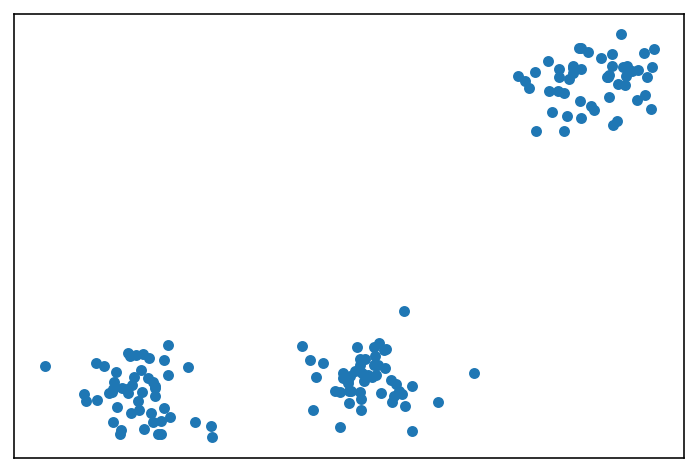

In [58]:
# （2）利用make_blobs函数生成150个样本数据，特征数为2的数据
X, Y = make_blobs(n_samples=150, n_features=2)
# （3）利用散点图展示出来
plt.figure(figsize=(6, 4), dpi=144)
plt.xticks(())
plt.yticks(())
plt.scatter(X[:,0], X[:,1], s=20, marker='o');  #用散点图画出每个样本的两个属性
plt.show()

In [59]:
#将数据集切分为训练集和测试集(比例为80%和20%)。
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.2);  # 切分训练集、测试集为8：2

In [60]:
# （3）利用KNN模型进行分类
knc = KNeighborsClassifier()  #生成K分类器实例
knc.fit(X_train,Y_train)   #使用训练数据训练分类器模型
y_predict = knc.predict(X_test)   #验证训练好的模型


In [61]:
# （4）使用模型自带的评估函数进行准确性测评。
print('The accuracy of K-Nearest Neighbor Classifier is', knc.score(X_test, Y_test)) #


The accuracy of K-Nearest Neighbor Classifier is 1.0


In [62]:
# （5）使用sklearn.metrics里面的classification_report模块对预测结果做更加详细的分析。
print(classification_report(Y_test,y_predict)) #


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 3.实验题3
对sklearn中的手写数字使用KNN分类器进行分类分析，将原数据的80%设为训练数据，20%设为测试数据。

In [63]:
# （1）导入库
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier   #导入KNeighborsClassifier类
from sklearn.model_selection import train_test_split   #导入train_test_split方法
from sklearn.metrics import classification_report   #导入classification_report模块

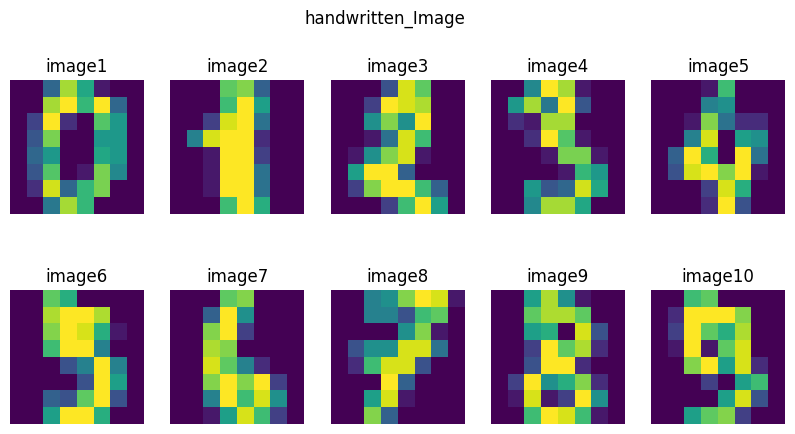

In [64]:
# （2）调用load_digits()读入手写数字信息，并显示前十张图片展示手写数字
digits = load_digits()
images = digits.images
plt.figure(figsize=(10, 5))
plt.suptitle('handwritten_Image')
# 前十张图片
for i in range(10):
    plt.subplot(2, 5, i + 1), plt.title('image%i' % (i + 1))
    plt.imshow(images[i]), plt.axis('off')
plt.show()

In [65]:
# （3）分割数据，将数据集切分为训练集和测试集(比例为80%和20%)。
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=33)  # 切分训练集、测试集为8：2


In [66]:
# （4）利用KNN模型进行分类
knc = KNeighborsClassifier()  #生成K分类器实例
knc.fit(X_train,Y_train)   #使用训练数据训练分类器模型
y_predict = knc.predict(X_test)   #验证训练好的模型

In [67]:
# （5）使用模型自带的评估函数进行准确性测评。
print('The accuracy of K-Nearest Neighbor Classifier is', knc.score(X_test, Y_test)) #


The accuracy of K-Nearest Neighbor Classifier is 0.9861111111111112


In [68]:
# （6）使用sklearn.metrics里面的classification_report模块对预测结果做更加详细的分析。
print(classification_report(Y_test,y_predict))  #


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.94      1.00      0.97        46
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        25
           5       0.97      0.97      0.97        37
           6       0.98      1.00      0.99        41
           7       1.00      1.00      1.00        29
           8       1.00      0.95      0.98        44
           9       1.00      0.94      0.97        33

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### 4.附加题

文件sample2中存放着一些电影的名称和统计数据，前8部片子已给出电影类型（动作片或爱情片），请使用KNN分类器，预测第9部片子的电影类型。

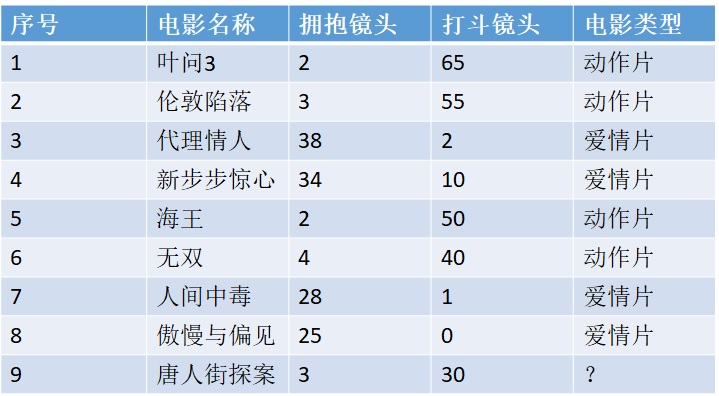

提示：因样本数据较少，建议K值取3。这里，“拥抱镜头”和“打斗镜头”可作为特征集，“电影类型”可作为标签集，但需二值化处理。建议特征集也作归一化处理。最后给出结论（第9部电影“唐人街探案”是什么片）。

In [69]:

# 最后进行了一个输入的操作，但是再jupyter里面好像会一直运行下去如果不输入的话，所以要不在运行的时候输入以下吧
# 这里测试出来的动作片的数值一直是0，爱情片的数值是1
'''
第四题

建议k值选取3
拥抱镜头和打斗镜头 特征集
电影类型          标签集
需要二值化处理
特征集归一化处理
最后得出结论 第九部电影是什么片
'''
# 导入库
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# 归一化对象
minmax_scaler = MinMaxScaler()
# 二值化对象
lb = preprocessing.LabelBinarizer()
# 模型对象
k = 3
knc = KNeighborsClassifier(n_neighbors=k)

# 导入数据
filmdata = pd.read_excel(r'F:\Coding\JupyterNotebook\人工智能B\第八讲作业\sample2.xlsx')
print(filmdata)
# -----------------------------进行数据处理-------------------------------------
filmusingdata = filmdata.dropna(axis=0,inplace=False)
filmunkowndatatemp = filmdata.iloc[filmusingdata.shape[0]:,2:4]
print(filmusingdata)
print(filmunkowndatatemp)
# 获得数据集和标签集
Xtemp = filmusingdata.iloc[:,2:4]
Ytemp = filmusingdata.iloc[:,4]
# 对数据进行二值化处理
Y = lb.fit_transform(Ytemp)
print(Y[0],Ytemp[0])
dongzuopian = input('动作片数值')
# 对数据集进行二值化处理
X = minmax_scaler.fit_transform(Xtemp)
filmunkowndata = minmax_scaler.transform(filmunkowndatatemp)
# 将数据集合拆分为两部分
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=69)
# -----------------------------进行模型练习------------------------------------
knc.fit(X_train,Y_train)
y_predict = knc.predict(X_test)
print(Y_test,y_predict)
# -----------------------------进行预测---------------------------------
a = knc.predict(filmunkowndata)
print(a)
if int(a) == int(dongzuopian):
    print('电影是动作片')
else:
    print('电影是爱情片')


   序号   电影名称  拥抱镜头  打斗镜头 电影类型
0   1    叶问3     2    65  动作片
1   2   伦敦陷落     3    55  动作片
2   3   代理情人    38     2  爱情片
3   4  新步步惊心    34    10  爱情片
4   5     海王     2    50  动作片
5   6     无双     4    40  动作片
6   7   人间中毒    28     1  爱情片
7   8  傲慢与偏见    25     0  爱情片
8   9  唐人街探案     3    30  NaN
   序号   电影名称  拥抱镜头  打斗镜头 电影类型
0   1    叶问3     2    65  动作片
1   2   伦敦陷落     3    55  动作片
2   3   代理情人    38     2  爱情片
3   4  新步步惊心    34    10  爱情片
4   5     海王     2    50  动作片
5   6     无双     4    40  动作片
6   7   人间中毒    28     1  爱情片
7   8  傲慢与偏见    25     0  爱情片
   拥抱镜头  打斗镜头
8     3    30
[0] 动作片
[[0]
 [0]] [0 0]
[0]
电影是动作片


C:\Users\陆知辰\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
